In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('test.csv')

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test['Age'].isnull().values.any()

True

In [7]:
trainNumAge = train.copy()

In [8]:
trainNumAge['Sex'] = trainNumAge['Sex'].map({'female': 1, 'male': 0})

In [9]:
trainNumAge.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [10]:
trainNumEmbarked = trainNumAge.copy()

In [11]:
trainNumEmbarked['Embarked'] = trainNumEmbarked['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [12]:
trainNumEmbarked.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [13]:
trainNumEmbarked['Embarked'].isnull().values.any()

True

In [14]:
trainNumEmbarked['Embarked'].fillna(99, inplace=True)

In [15]:
trainNumEmbarked['Embarked'].isnull().values.any()

False

In [16]:
trainNumEmbarked['Age'].isnull().values.any()

True

In [17]:
# First we will try to get age in place of Nan
trainNoNan = trainNumEmbarked[['Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']]

In [18]:
trainNoNan = trainNumEmbarked[trainNumEmbarked['Age'].notnull()]

In [19]:
trainNoNan.shape

(714, 12)

In [20]:
trainNan = trainNumEmbarked[trainNumEmbarked['Age'].isnull()]

In [21]:
trainNan.shape

(177, 12)

In [22]:
trainNoNan = trainNoNan[['Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']]
ageTest = trainNan[['Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked']]

In [23]:
ageX = trainNoNan[['Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked']]
ageY = trainNoNan['Age']

In [24]:
ageX.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,1.0
1,1,1,1,1,0,71.2833,2.0
2,1,3,1,0,0,7.9250,1.0
3,1,1,1,1,0,53.1000,1.0
4,0,3,0,0,0,8.0500,1.0
6,0,1,0,0,0,51.8625,1.0
7,0,3,0,3,1,21.0750,1.0
8,1,3,1,0,2,11.1333,1.0
9,1,2,1,1,0,30.0708,2.0
10,1,3,1,1,1,16.7000,1.0


In [25]:
ageY.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [26]:
ageTest.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
5,0,3,0,0,0,8.4583,3.0
17,1,2,0,0,0,13.0000,1.0
19,1,3,1,0,0,7.2250,2.0
26,0,3,0,0,0,7.2250,2.0
28,1,3,1,0,0,7.8792,3.0
29,0,3,0,0,0,7.8958,1.0
31,1,1,1,1,0,146.5208,2.0
32,1,3,1,0,0,7.7500,3.0
36,1,3,0,0,0,7.2292,2.0
42,0,3,0,0,0,7.8958,2.0


In [27]:
X = ageX.to_numpy()

In [28]:
y = ageY.to_numpy()

In [29]:
test = ageTest.to_numpy()

In [30]:
X = np.around(X)
y = np.around(y)
test = np.around(test)

In [31]:
X = X.astype(int)
y = y.astype(int)
test = test.astype(int)

In [32]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(test)

C:\Users\varun\anaconda3\envs\tensor_env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([30, 22, 30, 20, 30, 28, 35, 30, 20, 30, 28, 30, 30, 25, 24, 30, 25,
       28, 28, 30, 28, 28, 28, 22, 30, 28, 30, 24, 24, 28, 28,  2, 24, 30,
        2,  2, 30, 36, 30, 30, 30,  2, 20, 28,  2, 22, 30, 30, 28, 24, 30,
       30, 30, 30, 20, 30, 30, 30, 30, 30, 30, 28, 35,  2, 30, 35, 28, 22,
       30, 20, 30, 30, 30, 30, 30, 24, 28, 30,  2, 28, 20, 20, 22, 30, 28,
       30, 22, 22, 28, 28, 24, 30, 28, 20, 30, 28, 36, 20,  2, 28, 30, 28,
       30, 30, 28, 30, 20, 20, 35, 20, 24, 28, 30, 30, 35, 30, 28, 22, 20,
       30, 30, 30, 28, 20, 22, 20, 28, 21, 28, 30, 30, 30, 20, 28, 22, 28,
       28, 30, 28, 28, 24, 20, 30, 22, 30, 25, 30, 30, 30, 20, 28, 28, 30,
       28, 30, 30, 20, 30, 30,  1, 30,  2, 30, 20, 20, 21, 30, 20, 28, 30,
        2, 24, 20,  2, 28, 28, 24])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [34]:
# STEP 2: train the model on the training set
logreg.fit(X_train, y_train)

C:\Users\varun\anaconda3\envs\tensor_env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [35]:
logreg.fit(X_train, y_train)
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.02097902097902098


C:\Users\varun\anaconda3\envs\tensor_env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

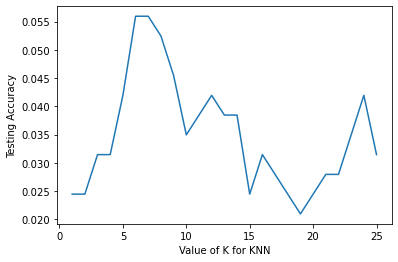

In [37]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [113]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.055944055944055944

In [114]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)
finalTest = knn.predict(test)

In [115]:
finalTest

array([21, 19, 22, 30, 16, 19, 58, 16, 22, 33, 19,  9, 16, 34,  8, 62,  9,
       19, 19, 16, 19, 19, 19, 16, 30, 19, 21,  4,  1, 22, 22, 21, 22, 16,
       24, 21, 23, 31,  9, 21, 16, 21, 21, 19,  2, 14, 14,  9, 22, 21, 21,
       16, 27, 16, 19, 16, 62, 19, 16, 28, 30, 19, 17, 21, 30, 22, 19, 24,
       28, 30, 16, 16,  9, 22, 16, 39, 19, 21,  2, 19, 18, 19, 14, 33, 22,
       21, 24, 16, 34, 19, 35, 21, 19, 19, 21, 22, 19, 19,  2, 34, 14, 28,
       16, 28, 19, 28, 30, 30, 15, 30,  1, 18, 23, 21, 15, 21, 19, 14, 30,
       16, 14, 17, 19,  0, 61, 30, 19,  3, 22,  9, 21, 21, 19, 28, 32, 19,
       19, 16, 19, 19, 35, 19, 16, 32, 16,  9, 62, 20, 16, 19, 19, 19, 19,
       18,  1, 28, 30, 21, 21,  4, 21, 21, 26, 19, 18, 32, 16, 30, 19, 26,
       21, 19, 30, 21, 20, 19,  4])

In [93]:
### We are getting very low accuracy may be because there are so many features. Lets try with less features

In [73]:
newAgeTest = trainNan[['Survived','Pclass','Sex','Fare']]
newAgeX = trainNoNan[['Survived','Pclass','Sex','Fare']]
newAgeY = trainNoNan['Age']

In [74]:
newAgeX.head()

,Survived,Pclass,Sex,Fare
0,0,3,0,7.2500
1,1,1,1,71.2833
2,1,3,1,7.9250
3,1,1,1,53.1000
4,0,3,0,8.0500


In [76]:
newAgeY.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [77]:
newAgeTest.head()

,Survived,Pclass,Sex,Fare
5,0,3,0,8.4583
17,1,2,0,13.0000
19,1,3,1,7.2250
26,0,3,0,7.2250
28,1,3,1,7.8792


In [78]:
X = newAgeX.to_numpy()
y = newAgeY.to_numpy()
test = newAgeTest.to_numpy()

In [79]:
X = np.around(X)
y = np.around(y)
test = np.around(test)

In [80]:
X = X.astype(int)
y = y.astype(int)
test = test.astype(int)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [83]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.04895104895104895

Text(0, 0.5, 'Testing Accuracy')

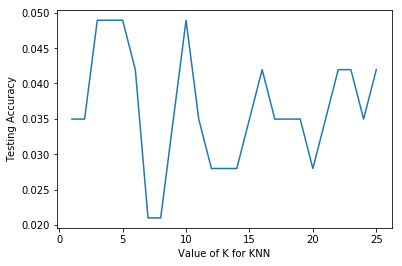

In [84]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [88]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.04895104895104895

Text(0, 0.5, 'Testing Accuracy')

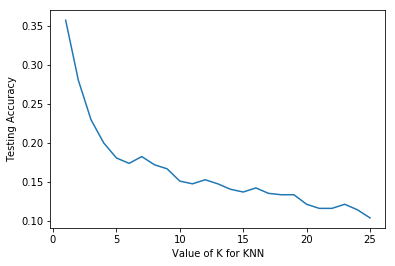

In [89]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    scores.append(metrics.accuracy_score(y_train, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [90]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
metrics.accuracy_score(y_train, y_pred)

0.3572679509632224

In [91]:
type(X)

numpy.ndarray

In [116]:
### Working with finalTest

In [117]:
newAges = pd.DataFrame(finalTest)

In [118]:
newAges.head()

,0
0,21
1,19
2,22
3,30
4,16


In [124]:
ageTest['Age'] = finalTest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
ageTest.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
5,0,3,0,0,0,8.4583,3.0,21
17,1,2,0,0,0,13.0000,1.0,19
19,1,3,1,0,0,7.2250,2.0,22
26,0,3,0,0,0,7.2250,2.0,30
28,1,3,1,0,0,7.8792,3.0,16


In [126]:
train = ageX[[]] + ageY

In [136]:
train = ageX.copy()

In [140]:
train = train.join(ageY, how='outer')

In [144]:
train = pd.concat([train, ageTest])

In [148]:
train = train.sort_index()

In [149]:
train.head(6)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0,3,0,1,0,7.2500,1.0,22.0
1,1,1,1,1,0,71.2833,2.0,38.0
2,1,3,1,0,0,7.9250,1.0,26.0
3,1,1,1,1,0,53.1000,1.0,35.0
4,0,3,0,0,0,8.0500,1.0,35.0
5,0,3,0,0,0,8.4583,3.0,21.0


In [175]:
X = train[['Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']]
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,3,0,1,0,7.2500,1.0,22.0
1,1,1,1,0,71.2833,2.0,38.0
2,3,1,0,0,7.9250,1.0,26.0
3,1,1,1,0,53.1000,1.0,35.0
4,3,0,0,0,8.0500,1.0,35.0


In [176]:
y = train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [223]:
test = pd.read_csv('test.csv')

In [224]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [222]:
test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [225]:
testNotNull = test[test['Age'].notnull()]

In [226]:
testNotNull.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [215]:
testNotNull['Sex'] = testNotNull['Sex'].map({'female': 1, 'male': 0})
testNotNull['Embarked'] = testNotNull['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [177]:
X = X.to_numpy()
y = y.to_numpy()

In [178]:
X = np.around(X)
y = np.around(y)

In [179]:
X = X.astype(int)
y = y.astype(int)

In [216]:
testNotNull = testNotNull.to_numpy().around().astype(int)

AttributeError: 'numpy.ndarray' object has no attribute 'around'

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [182]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [183]:
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8235294117647058

Text(0, 0.5, 'Testing Accuracy')

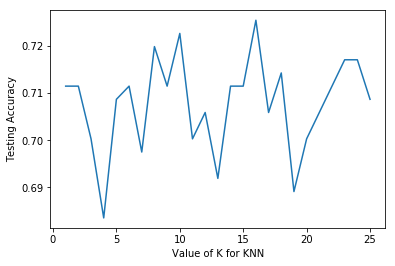

In [184]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [187]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7254901960784313

In [217]:
testNotNull = testNotNull.to_numpy()
testNotNull = np.around(testNotNull).astype(int)

In [218]:
testNotNull

array([[  3,   0,  34, ...,   0,   8,   3],
       [  3,   1,  47, ...,   0,   7,   1],
       [  2,   0,  62, ...,   0,  10,   3],
       ...,
       [  3,   1,  28, ...,   0,   8,   1],
       [  1,   1,  39, ...,   0, 109,   2],
       [  3,   0,  38, ...,   0,   7,   1]])

In [231]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X, y)
y_pred = knn.predict(X)
metrics.accuracy_score(y, y_pred)

0.7463524130190797

In [221]:
logreg.fit(X, y)
result = logreg.predict(testNotNull)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [227]:
testNotNull['Survived'] = result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [228]:
testNotNull

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0
